## 2022 Predict Ideology of Banks from Tweets

In [2]:
from fastai.text.all import *
import warnings, transformers
transformers.utils.logging.set_verbosity(40) 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from ideology_utils import *

### Download New Tweets

In [4]:
#group = get_tweets_of_group("handles_banks.csv", "banks")

askregions.csv
bbva_usa.csv
bmo.csv
bnymellon.csv
BofA_News.csv
bokfinancial.csv
capitalone.csv
citi.csv
citizensbank.csv
comericabank.csv
creditsuisse.csv
fifththird.csv
firstcitizens.csv
firstrepublic.csv
goldmansachs.csv
hsbc.csv
huntington_bank.csv
jpmorgan.csv
keybank.csv
mandt_bank.csv
merrillLynch.csv
morganstanley.csv
northerntrust.csv
pncbank.csv
rbc.csv
svb_financial.csv
td_canada.csv
truistNews.csv
usbank.csv
wellsfargo.csv
zionsbank.csv


### Load Tweets

In [5]:
path = Path('tweets')
df_banks = pd.concat(map(tweets2df, path.rglob("tweets-banks*")))

### Score Tweets and Pickle Scores

In [6]:
model = "ulmfit-2022.pkl"
learn = load_learner(model)

In [7]:
scores = {}
for g in group.ls().shuffle():
    try:
        handle, s1, s2, n = ideology_score(g, model)
        scores[handle] = [s1,s2,n]
        print([handle,s1,s2,n])
    except:
        continue

['bnymellon', 0.22, 0.33, 9]


['rbc', 0.24, 0.29, 37]


['northerntrust', 0.0, 0.14, 3]


['bokfinancial', 0.5, 0.57, 4]


['askregions', 0.2, 0.26, 41]


['usbank', 0.29, 0.28, 14]


['jpmorgan', 0.33, 0.31, 6]


['goldmansachs', 0.5, 0.56, 4]


['creditsuisse', 0.2, 0.24, 5]


['capitalone', 0.17, 0.22, 12]


['merrillLynch', 0.2, 0.28, 5]


['zionsbank', 0.5, 0.49, 6]


['firstcitizens', 0.2, 0.32, 5]


['svb_financial', 0.27, 0.36, 11]


['firstrepublic', 0.6, 0.58, 10]


['td_canada', 0.14, 0.21, 71]


['huntington_bank', 0.33, 0.33, 3]


['citizensbank', 0.42, 0.49, 24]


['hsbc', 0.0, 0.16, 2]


['truistNews', 0.11, 0.19, 132]


['citi', 0.23, 0.36, 13]


['morganstanley', 0.38, 0.39, 21]
empty: tweets/tweets-banks-2022-06-16/bbva_usa.csv


['wellsfargo', 0.2, 0.26, 358]


['fifththird', 0.2, 0.28, 49]


['comericabank', 0.31, 0.35, 13]


['BofA_News', 0.1, 0.26, 10]


['pncbank', 0.0, 0.06, 1]


['bmo', 0.15, 0.23, 52]


['keybank', 0.25, 0.21, 4]


['mandt_bank', 0.2, 0.2, 10]


In [8]:
fn_pickle = f'scores-{group.name}.pickle'
fn_pickle

'scores-tweets-banks-2022-06-16.pickle'

In [9]:
pd.to_pickle(scores,fn_pickle)

### UnPickle Tweet Scores 

In [10]:
fn_pickle = 'scores-tweets-banks-2022-06-16.pickle'
scores = pd.read_pickle(fn_pickle)

In [11]:
scores = {k:v for k,v in scores.items() if v[2]>9} # 10 or more tweets

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.

### Ideology Score of Large Banks

In [12]:
df = scores2df(scores,'s2')

#### 0 is progressive, 1 is conservative

<AxesSubplot:ylabel='handle'>

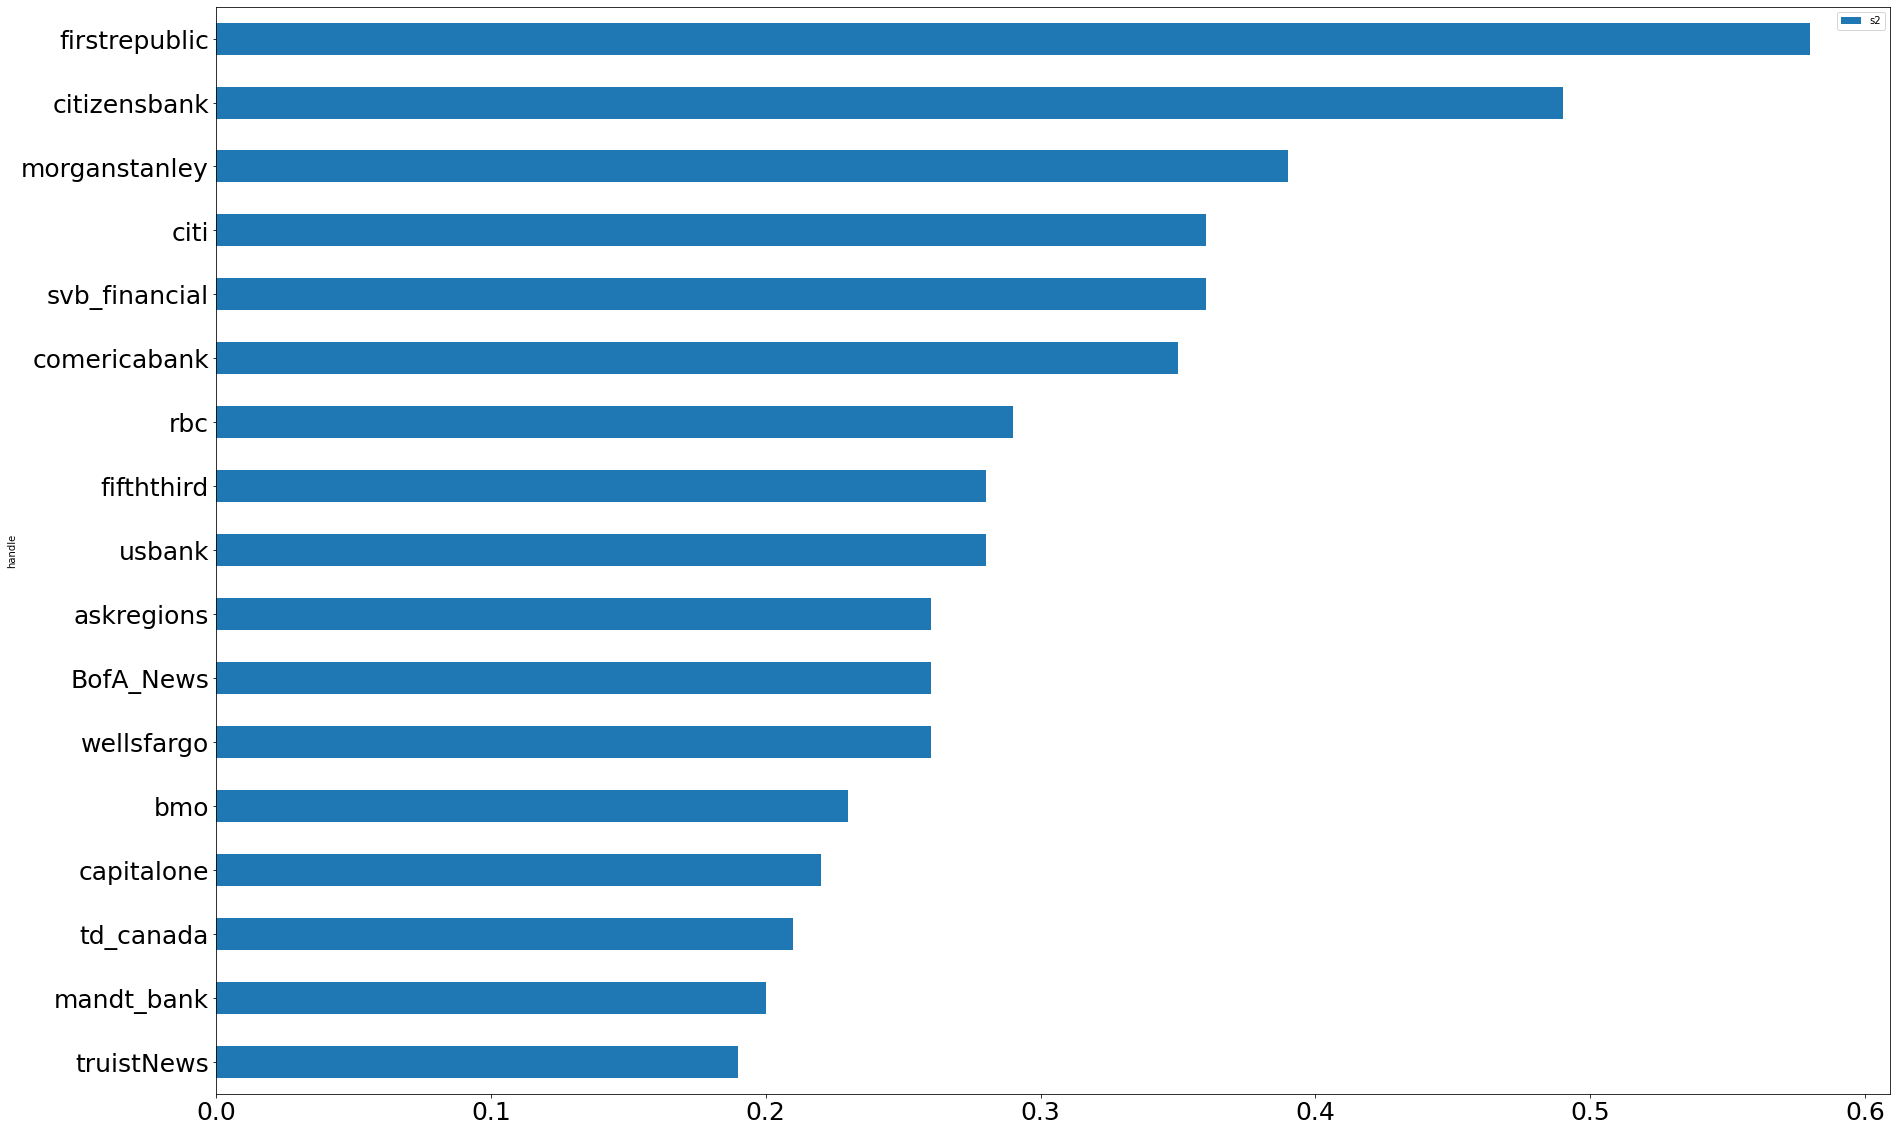

In [13]:
df.plot.barh(y='s2',x='handle',figsize=(30,20),fontsize=25)

# I AM HERE
The ULMfit model is just using most recently downloaded tweets, whereas the Roberta is using all 2022 bank tweets

### Ideology of Large Banks using Transformers Model `blue-or-red-roberta-2022`

In [14]:
trainer,tokz = load_tfms_model()

In [15]:
path = Path('tweets')
df_banks = pd.concat(map(tweets2df, path.rglob("tweets-banks*")))

In [16]:
def calculate_score(preds):
    n   = len(preds)
    s1  = round(sum(np.argmax(preds.numpy(),axis=1))/len(preds),2)
    d,r = sum(preds.numpy())/n
    s2  = round(r,2) 
    return [s1,s2,n]

# IM HERE 2

In [17]:
scores = {}
for bank in df_banks.groupby('handle'):
    handle, df  = bank
    try:
        df = preprocess_tweets(df)
        ds_eval = df2ds(df, tokz)
        preds = predict_tfms(ds_eval, trainer)
        s1,s2,n = calculate_score(preds)
        scores[handle] = [s1,s2,n]
        print(calculate_score(preds))
        scores[handle] = calculate_score(preds)
        print([handle,s1,s2,n])
    except:
        continue
scores_tfms = scores

  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 10
  Batch size = 512


[0.5, 0.47, 10]
['BofA_News', 0.5, 0.47, 10]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 143
  Batch size = 512


[0.78, 0.65, 143]
['askregions', 0.78, 0.65, 143]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 223
  Batch size = 512


[0.74, 0.62, 223]
['bmo', 0.74, 0.62, 223]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 18
  Batch size = 512


[0.33, 0.33, 18]
['bnymellon', 0.33, 0.33, 18]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 8
  Batch size = 512


[0.5, 0.55, 8]
['bokfinancial', 0.5, 0.55, 8]


  0%|          | 0/2 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1020
  Batch size = 512


[0.0, 0.0, 1020]
['capitalone', 0.0, 0.0, 1020]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 30
  Batch size = 512


[0.37, 0.39, 30]
['citi', 0.37, 0.39, 30]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 83
  Batch size = 512


[0.58, 0.54, 83]
['citizensbank', 0.58, 0.54, 83]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 40
  Batch size = 512


[0.4, 0.45, 40]
['comericabank', 0.4, 0.45, 40]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 7
  Batch size = 512


[0.29, 0.39, 7]
['creditsuisse', 0.29, 0.39, 7]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 129
  Batch size = 512


[0.51, 0.48, 129]
['fifththird', 0.51, 0.48, 129]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 13
  Batch size = 512


[0.31, 0.35, 13]
['firstcitizens', 0.31, 0.35, 13]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 27
  Batch size = 512


[0.48, 0.46, 27]
['firstrepublic', 0.48, 0.46, 27]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 21
  Batch size = 512


[0.29, 0.28, 21]
['goldmansachs', 0.29, 0.28, 21]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 8
  Batch size = 512


[0.25, 0.28, 8]
['hsbc', 0.25, 0.28, 8]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 5
  Batch size = 512


[0.6, 0.52, 5]
['huntington_bank', 0.6, 0.52, 5]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 23
  Batch size = 512


[0.17, 0.19, 23]
['jpmorgan', 0.17, 0.19, 23]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 13
  Batch size = 512


[0.23, 0.28, 13]
['keybank', 0.23, 0.28, 13]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 23
  Batch size = 512


[0.22, 0.23, 23]
['mandt_bank', 0.22, 0.23, 23]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 5
  Batch size = 512


[0.2, 0.21, 5]
['merrillLynch', 0.2, 0.21, 5]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 45
  Batch size = 512


[0.4, 0.43, 45]
['morganstanley', 0.4, 0.43, 45]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 6
  Batch size = 512


[0.17, 0.23, 6]
['northerntrust', 0.17, 0.23, 6]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 88
  Batch size = 512


[0.08, 0.08, 88]
['pncbank', 0.08, 0.08, 88]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 185
  Batch size = 512


[0.48, 0.47, 185]
['rbc', 0.48, 0.47, 185]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 38
  Batch size = 512


[0.29, 0.3, 38]
['svb_financial', 0.29, 0.3, 38]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 229
  Batch size = 512


[0.62, 0.55, 229]
['td_canada', 0.62, 0.55, 229]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 132
  Batch size = 512


[0.68, 0.63, 132]
['truistNews', 0.68, 0.63, 132]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 42
  Batch size = 512


[0.29, 0.27, 42]
['usbank', 0.29, 0.27, 42]


  0%|          | 0/2 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1068
  Batch size = 512


[0.39, 0.42, 1068]
['wellsfargo', 0.39, 0.42, 1068]


  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: input, handle. If input, handle are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 17
  Batch size = 512


[0.53, 0.44, 17]
['zionsbank', 0.53, 0.44, 17]


In [22]:
scores_tfms = {k:v for k,v in scores_tfms.items() if v[2]>9} # 10 or more tweets
scores_tfms

{'BofA_News': [0.5, 0.47, 10],
 'askregions': [0.78, 0.65, 143],
 'bmo': [0.74, 0.62, 223],
 'bnymellon': [0.33, 0.33, 18],
 'capitalone': [0.0, 0.0, 1020],
 'citi': [0.37, 0.39, 30],
 'citizensbank': [0.58, 0.54, 83],
 'comericabank': [0.4, 0.45, 40],
 'fifththird': [0.51, 0.48, 129],
 'firstcitizens': [0.31, 0.35, 13],
 'firstrepublic': [0.48, 0.46, 27],
 'goldmansachs': [0.29, 0.28, 21],
 'jpmorgan': [0.17, 0.19, 23],
 'keybank': [0.23, 0.28, 13],
 'mandt_bank': [0.22, 0.23, 23],
 'morganstanley': [0.4, 0.43, 45],
 'pncbank': [0.08, 0.08, 88],
 'rbc': [0.48, 0.47, 185],
 'svb_financial': [0.29, 0.3, 38],
 'td_canada': [0.62, 0.55, 229],
 'truistNews': [0.68, 0.63, 132],
 'usbank': [0.29, 0.27, 42],
 'wellsfargo': [0.39, 0.42, 1068],
 'zionsbank': [0.53, 0.44, 17]}

In [23]:
df = scores2df(scores_tfms,'s2')

#### 0 is progressive, 1 is conservative

<AxesSubplot:ylabel='handle'>

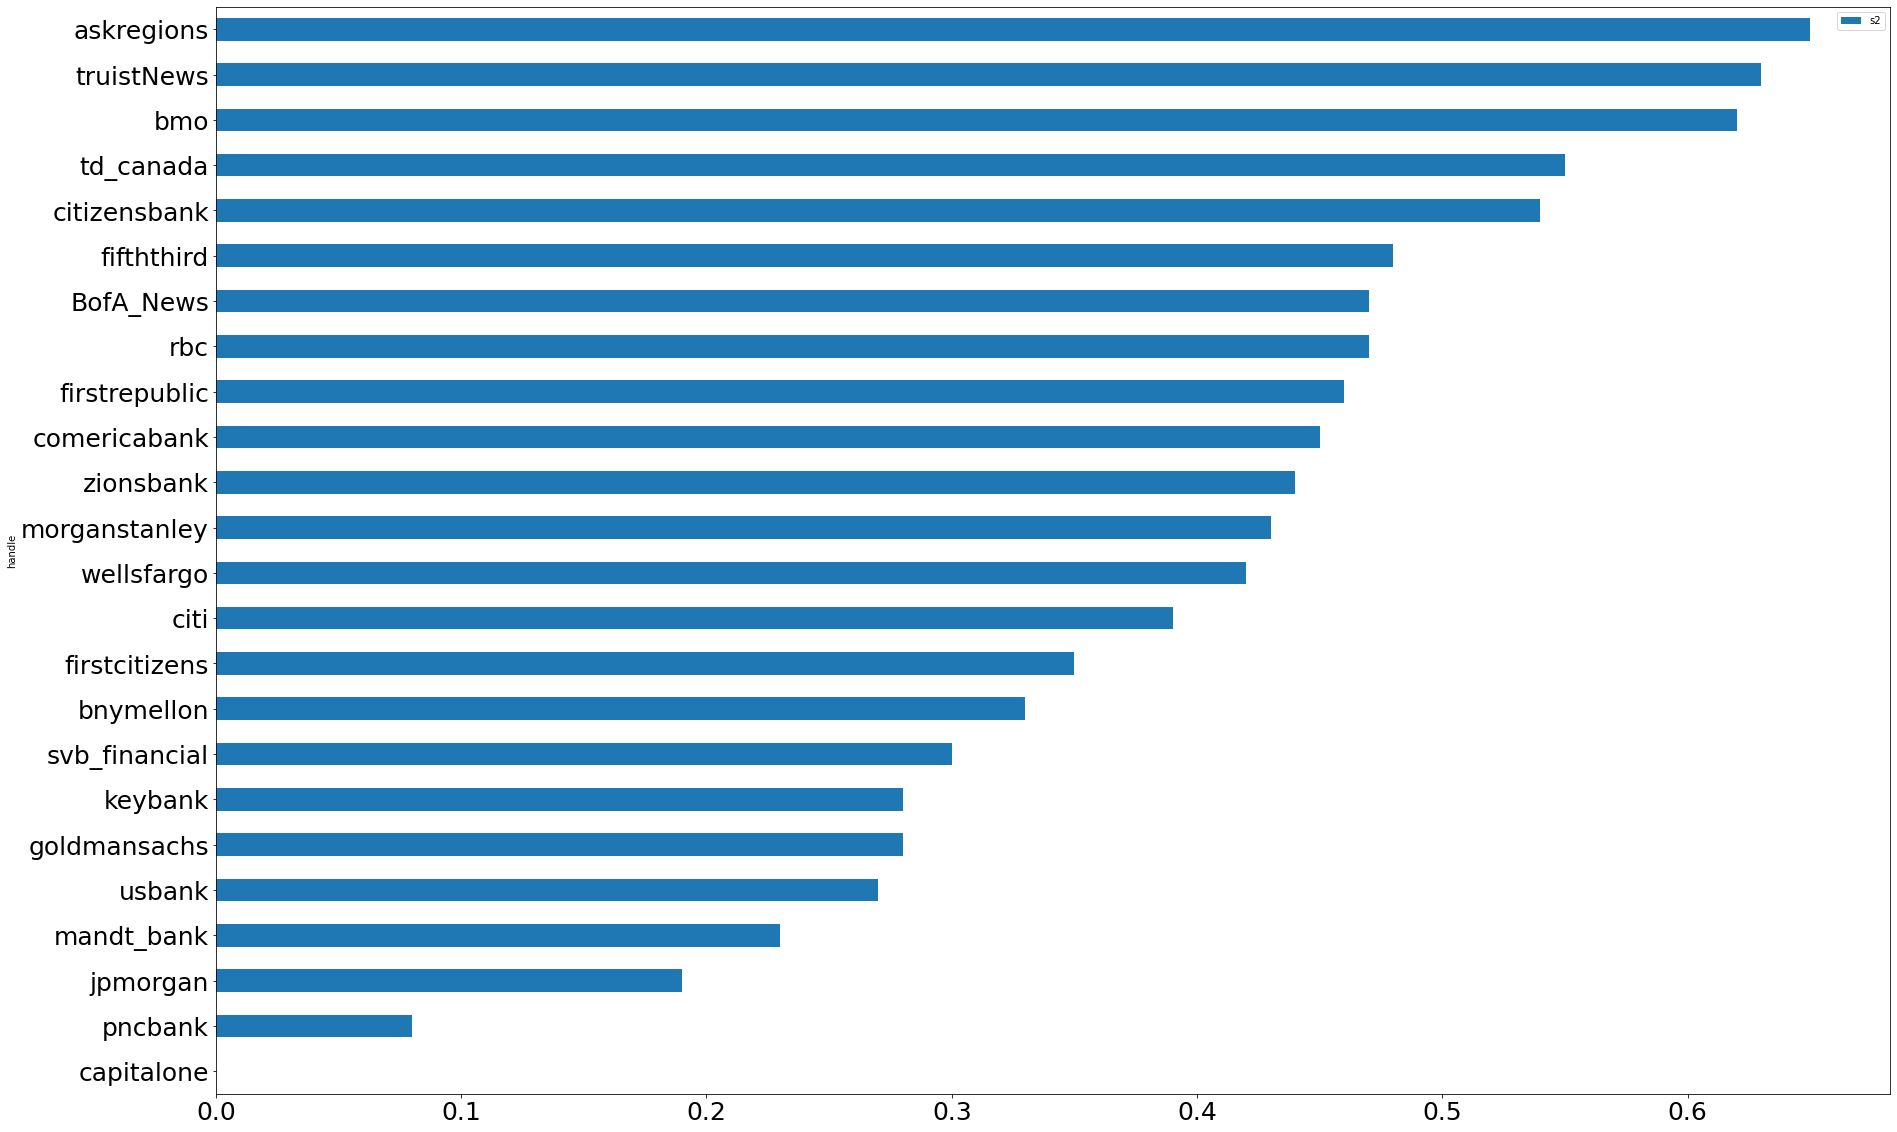

In [24]:
df.plot.barh(y='s2',x='handle',figsize=(30,20),fontsize=25)